In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


#plot parameters
font_size=10
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font',family='serif',serif='Computer Modern')
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size-1)

#color list
color_list = ["#c7e9b4","#7fcdbb","#41b6c4","#1d91c0","#225ea8", "#0c2c84"]
newcm = LinearSegmentedColormap.from_list('ColorMap',color_list)
color_list2 = ["#2b83ba","#fdae61","#83b692","#d36060","#8E7891"] #["#2b83ba","#d7191c","#fdae61"]

/var/folders/9v/j2dwy_kx7c32vpw655tnps0r0000gp/T/ipykernel_44959/1149202359.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


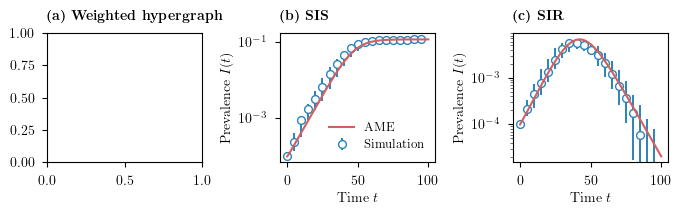

In [2]:
#plot

width = 7.057
height = width/3.5
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(width,height))
plt.subplots_adjust(left=0.1, bottom=0.23, right=0.98,
                    top=0.87, wspace=0.5, hspace=0.6)
#data import
exp = 'exp1'

#====================
#space for toy figure
#====================
axes[0].text(0, 1.1, r'\textbf{(a) Weighted hypergraph}', fontsize=font_size,
            transform=axes[0].transAxes)

#========
#SIS
#========
res_file = f'./time-evo-SIS/dat/res_{exp}.pk'
res = pickle.load(open(res_file,"rb"))
t = res['t']

#prevalence evolution
lw = 1.5
I_comp = res['I_comp']
indmax = 220
axes[1].plot(t[:indmax],I_comp[:indmax],
             label='AME', color=color_list2[3], lw=lw)
axes[1].set_yscale('log')
axes[1].set_xlabel(r'Time $t$')
axes[1].set_ylabel(r'Prevalence $I(t)$')
axes[1].text(0, 1.1, r'\textbf{(b) SIS}', fontsize=font_size,
            transform=axes[1].transAxes)

#prevalence simulation
ind_subset = list(range(0,100,5))
sim_file = f'./time-evo-SIS/dat/sim_{exp}.pk'
sim = pickle.load(open(sim_file,"rb"))
t_sim = sim['t'][ind_subset]
Ilist = sim['Ilist']
Imean = np.mean(Ilist,axis=0)[ind_subset]
Istd = np.std(Ilist,axis=0)[ind_subset]
Imedian = np.median(Ilist,axis=0)[ind_subset]
I25 = np.quantile(Ilist,q=0.25,axis=0)[ind_subset]
I75 = np.quantile(Ilist,q=0.75,axis=0)[ind_subset]
# axes[1].errorbar(t_sim, Imean, yerr=Istd, fmt='o',
#                     ecolor=color_list2[0],mec=color_list2[0],
#                     mfc='white', mew=1,zorder=-2)
axes[1].errorbar(t_sim, Imedian, yerr=np.array([Imedian-I25,I75-Imedian]), fmt='o',
                    ecolor=color_list2[0],mec=color_list2[0],
                    mfc='white', mew=1,zorder=-2, label = 'Simulation')

axes[1].legend(frameon=False, loc='best')
#==========
#SIR
#==========
res_file = f'./time-evo-SIR/dat/res_{exp}.pk'
res = pickle.load(open(res_file,"rb"))
t = res['t']

#prevalence evolution
lw = 1.5
I_comp = res['I_comp']

indmax = 250
axes[2].plot(t[:indmax],I_comp[:indmax],
             label='Complete', color=color_list2[3], lw=lw)

axes[2].set_yscale('log')
axes[2].set_xlabel(r'Time $t$')
axes[2].set_ylabel(r'Prevalence $I(t)$')


axes[2].text(0, 1.1, r'\textbf{(c) SIR}', fontsize=font_size,
            transform=axes[2].transAxes)

#prevalence simulation
ind_subset = list(range(0,100,5))
sim_file = f'./time-evo-SIR/dat/sim_{exp}.pk'
sim = pickle.load(open(sim_file,"rb"))
t_sim = sim['t'][ind_subset]
Ilist = sim['Ilist']
Imean = np.mean(Ilist,axis=0)[ind_subset]
Imedian = np.median(Ilist,axis=0)[ind_subset]
I25 = np.quantile(Ilist,q=0.25,axis=0)[ind_subset]
I75 = np.quantile(Ilist,q=0.75,axis=0)[ind_subset]
Istd = np.std(Ilist,axis=0)[ind_subset]
# axes[2].errorbar(t_sim, Imean, yerr=Istd, fmt='o',
#                     ecolor=color_list2[0],mec=color_list2[0],
#                     mfc='white', mew=1,zorder=-2)
axes[2].errorbar(t_sim, Imedian, yerr=np.array([Imedian-I25,I75-Imedian]), fmt='o',
                    ecolor=color_list2[0],mec=color_list2[0],
                    mfc='white', mew=1,zorder=-2)
plt.show()
